##Semester Long Project

In [7]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance

import seaborn as sns
from sklearn.metrics import silhouette_score,silhouette_samples

import warnings
import re



from IPython.core.interactiveshell import InteractiveShell
from IPython.core.display import display, HTML

InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_rows = 200
pd.options.display.max_columns = 300
warnings.filterwarnings("ignore")
%matplotlib inline

In [8]:
import pandas as pd
from google.colab import drive
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


from google.colab import drive


drive.mount('/content/drive', force_remount=True)

data = pd.read_csv('/content/drive/My Drive/user_behavior_dataset.csv')

data.head()

Mounted at /content/drive


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [10]:
print(data.columns)


Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')


In [11]:
# Check for missing values in the dataset
data.isnull().sum()



,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


In [17]:
# Strip any leading or trailing whitespace from column names
data.columns = data.columns.str.strip()

# Check the column names again
print(data.columns)



Index(['User ID', 'Operating System', 'App Usage Time (min/day)',
       'Screen On Time (hours/day)', 'Battery Drain (mAh/day)',
       'Number of Apps Installed', 'Data Usage (MB/day)', 'Age', 'Gender',
       'User Behavior Class', 'Device Model_OnePlus 9',
       'Device Model_Samsung Galaxy S21', 'Device Model_Xiaomi Mi 11',
       'Device Model_iPhone 12'],
      dtype='object')


In [18]:
# Check the first few rows to confirm One-Hot Encoding is applied
print(data.head())


   User ID Operating System  App Usage Time (min/day)  \
0        1          Android                       393   
1        2          Android                       268   
2        3          Android                       154   
3        4          Android                       239   
4        5              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40       1   
1                        42                  944   47       0   
2                        32                  322   42       1   
3                        56                  871

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB
None


In [ ]:
print(data.describe())


         User ID  App Usage Time (min/day)  Screen On Time (hours/day)  \
count  700.00000                700.000000                  700.000000   
mean   350.50000                271.128571                    5.272714   
std    202.21688                177.199484                    3.068584   
min      1.00000                 30.000000                    1.000000   
25%    175.75000                113.250000                    2.500000   
50%    350.50000                227.500000                    4.900000   
75%    525.25000                434.250000                    7.400000   
max    700.00000                598.000000                   12.000000   

       Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
count               700.000000                700.000000           700.000000   
mean               1525.158571                 50.681429           929.742857   
std                 819.136414                 26.943324           640.451729   
min      

##Deliverable 2

##Insight 1

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='App Usage Time (min/day)', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of App Usage Time (min/day)')

Text(0.5, 0, 'App Usage Time (min/day)')

Text(0, 0.5, 'Frequency')

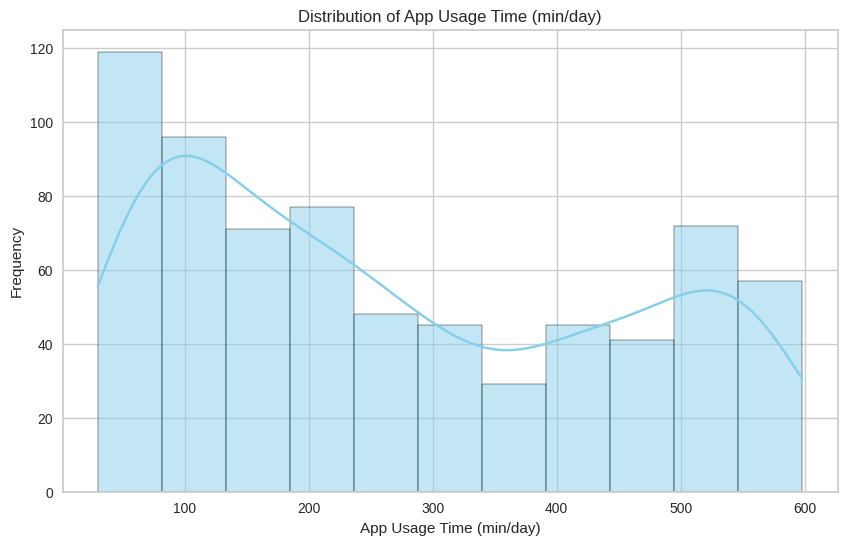

In [ ]:
# Create a histogram plot
# 'data['App Usage Time (min/day)']' represents the data to be plotted
plt.figure(figsize=(10, 6))
sns.histplot(data['App Usage Time (min/day)'], kde=True, color='skyblue')
plt.title('Distribution of App Usage Time (min/day)')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Frequency')
plt.show()


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Data Usage (MB/day)', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Data Usage (MB/day)')

Text(0.5, 0, 'Data Usage (MB/day)')

Text(0, 0.5, 'Frequency')

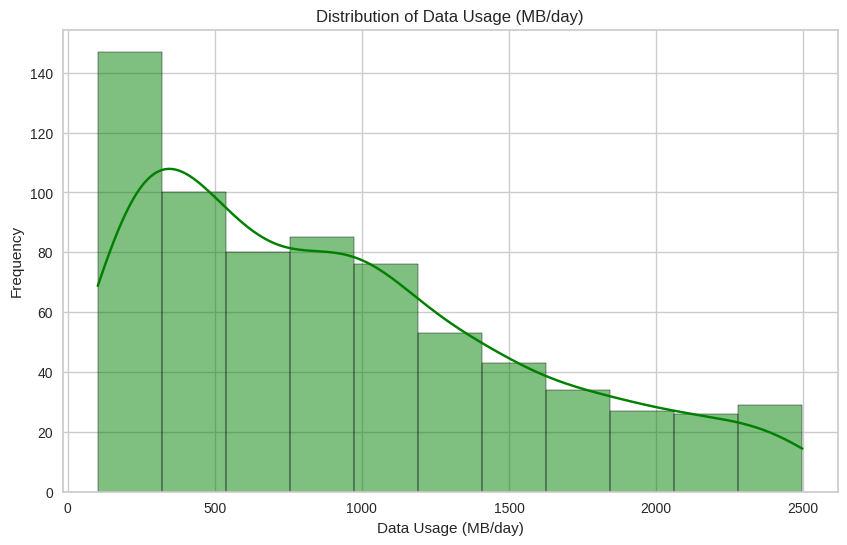

In [ ]:
# Plot a histogram with a kernel density estimate (KDE) overlay for the 'Data Usage (MB/day)' column
# 'color' sets the color of the histogram and KDE curve to green

plt.figure(figsize=(10, 6))
sns.histplot(data['Data Usage (MB/day)'], kde=True, color='green')
plt.title('Distribution of Data Usage (MB/day)')
plt.xlabel('Data Usage (MB/day)')
plt.ylabel('Frequency')
plt.show()



The overall shape of the distribution is skewed to the right, meaning that there are a few users with much higher data consumption than the majority. This type of distribution could suggest that the data usage has a natural ceiling for most users, but there are some power users who use much more data.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Data Usage (MB/day)', ylabel='App Usage Time (min/day)'>

Text(0.5, 1.0, 'Data Usage vs. App Usage Time')

Text(0.5, 0, 'Data Usage (MB/day)')

Text(0, 0.5, 'App Usage Time (min/day)')

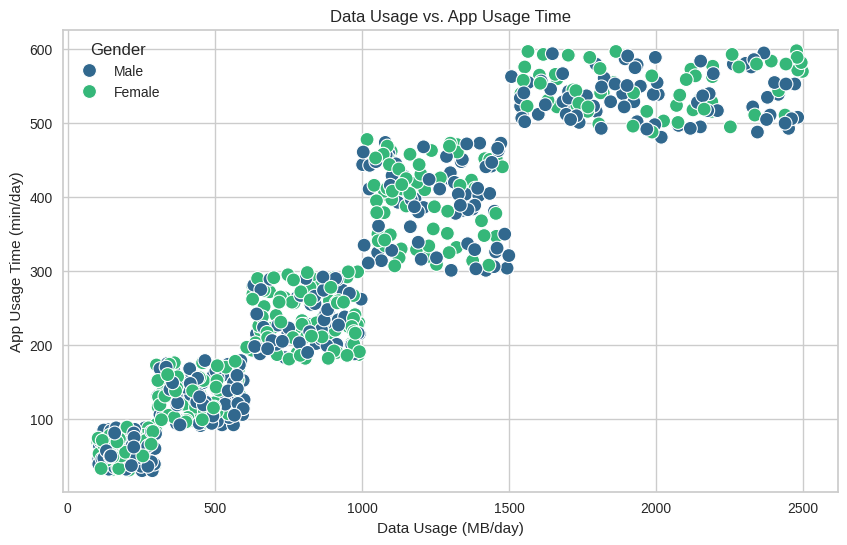

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Data Usage (MB/day)', y='App Usage Time (min/day)', hue='Gender', data=data, palette='viridis', s=100)
plt.title('Data Usage vs. App Usage Time')
plt.xlabel('Data Usage (MB/day)')
plt.ylabel('App Usage Time (min/day)')
plt.show()



##Insight 2

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Device Model', ylabel='Number of Apps Installed'>

Text(0.5, 1.0, 'Number of Apps Installed by Device Model')

Text(0.5, 0, 'Device Model')

Text(0, 0.5, 'Number of Apps Installed')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Google Pixel 5'),
  Text(1, 0, 'OnePlus 9'),
  Text(2, 0, 'Xiaomi Mi 11'),
  Text(3, 0, 'iPhone 12'),
  Text(4, 0, 'Samsung Galaxy S21')])

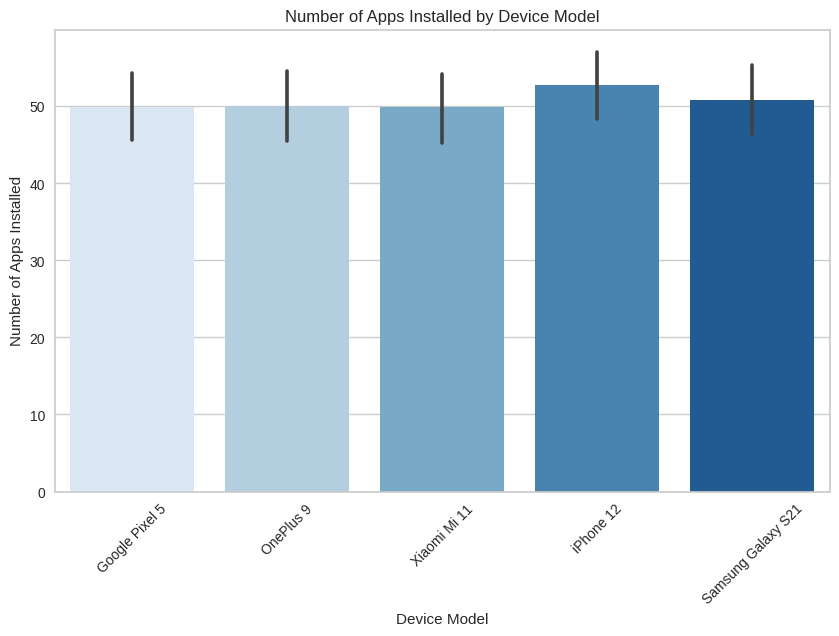

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Device Model', ylabel='count'>

Text(0.5, 1.0, 'Gender Distribution by Device Model')

Text(0.5, 0, 'Device Model')

Text(0, 0.5, 'Count')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Google Pixel 5'),
  Text(1, 0, 'OnePlus 9'),
  Text(2, 0, 'Xiaomi Mi 11'),
  Text(3, 0, 'iPhone 12'),
  Text(4, 0, 'Samsung Galaxy S21')])

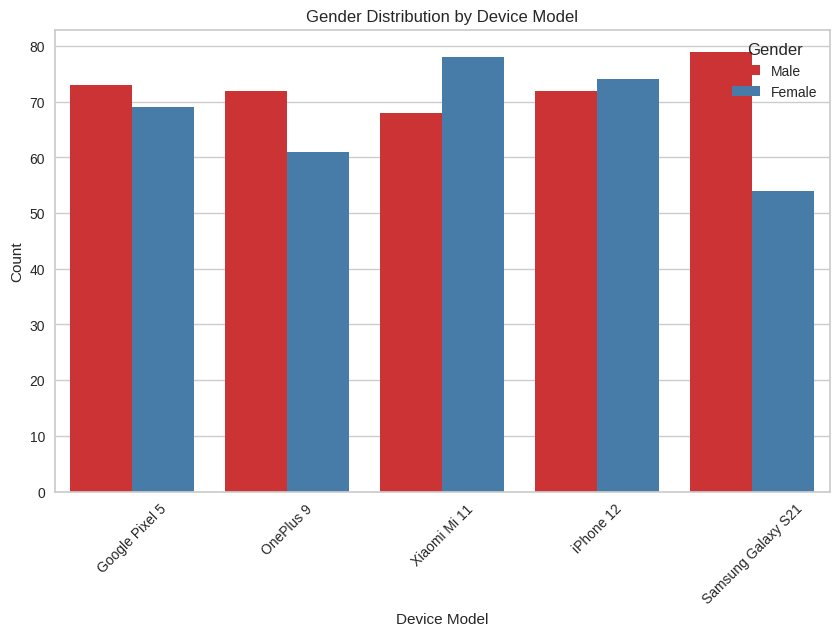

In [ ]:
# Create a bar plot for Number of Apps Installed by Device Model

plt.figure(figsize=(10, 6))
sns.barplot(x='Device Model', y='Number of Apps Installed', data=data, palette='Blues')
plt.title('Number of Apps Installed by Device Model')
plt.xlabel('Device Model')
plt.ylabel('Number of Apps Installed')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Device Model', hue='Gender', data=data, palette='Set1')
plt.title('Gender Distribution by Device Model')
plt.xlabel('Device Model')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Samsung Galaxy S21 and iPhone 12 users install the most apps, indicating these groups may be more engaged and likely to interact with new app offerings or mobile ads.

For most devices (Google Pixel 5, OnePlus 9, Xiaomi Mi 11, iPhone 12), the count of male and female users is very similar.


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap of Variables')

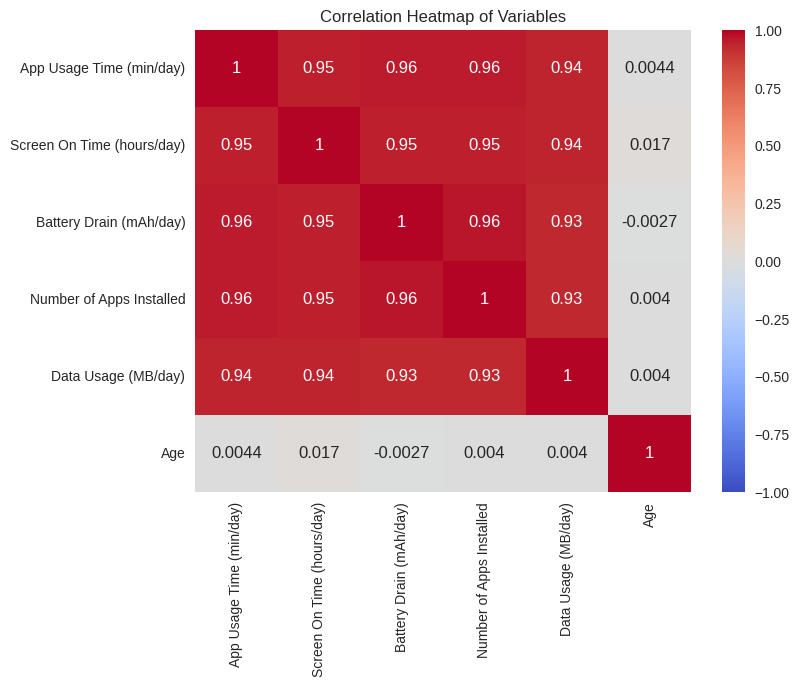

In [ ]:
# Calculate the correlation matrix for selected columns in the DataFrame
# The selected columns are related to usage patterns, battery, and age
correlation_matrix = data[['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)', 'Age']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Variables')
plt.show()


##Insights - 3

Mounted at /content/drive


<ipython-input-5-1bae4d3dc465>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Cluster', y='Count', data=age_cluster_count, palette='viridis')


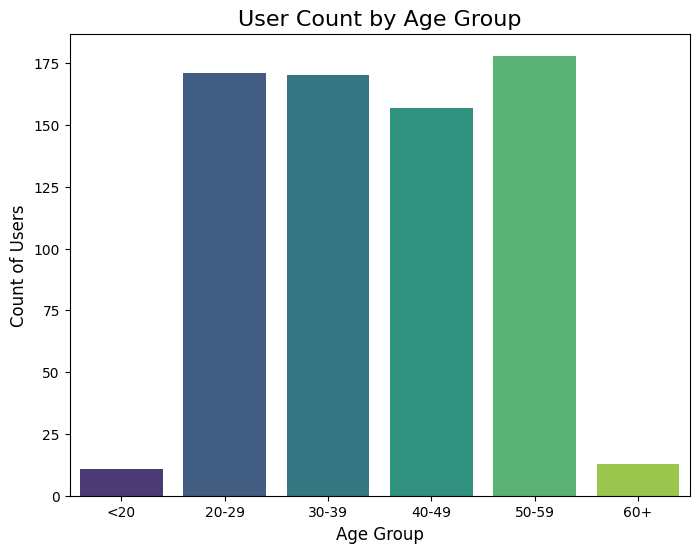

In [ ]:
# Define the age ranges for clustering users into different age groups

bins = [0, 19, 29, 39, 49, 59, 100]  # Define the age ranges (adjust as needed)
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']  # Labels for the age groups

data['Age Cluster'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

age_cluster_count = data['Age Cluster'].value_counts().reset_index(name='Count')

age_cluster_count.columns = ['Age Cluster', 'Count']

# Visualization Bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Age Cluster', y='Count', data=age_cluster_count, palette='viridis')

# Adding titles and labels
plt.title('User Count by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count of Users', fontsize=12)

# Show the plot
plt.show()


Index(['User ID', 'App Usage Time', 'Screen On Time', 'Battery Drain',
       'Number of Apps Installed', 'Data Usage', 'Age', 'User Behavior Class',
       'Device Model_OnePlus 9', 'Device Model_Samsung Galaxy S21',
       'Device Model_Xiaomi Mi 11', 'Device Model_iPhone 12',
       'Operating System_iOS', 'Gender_Male', 'Gender'],
      dtype='object')


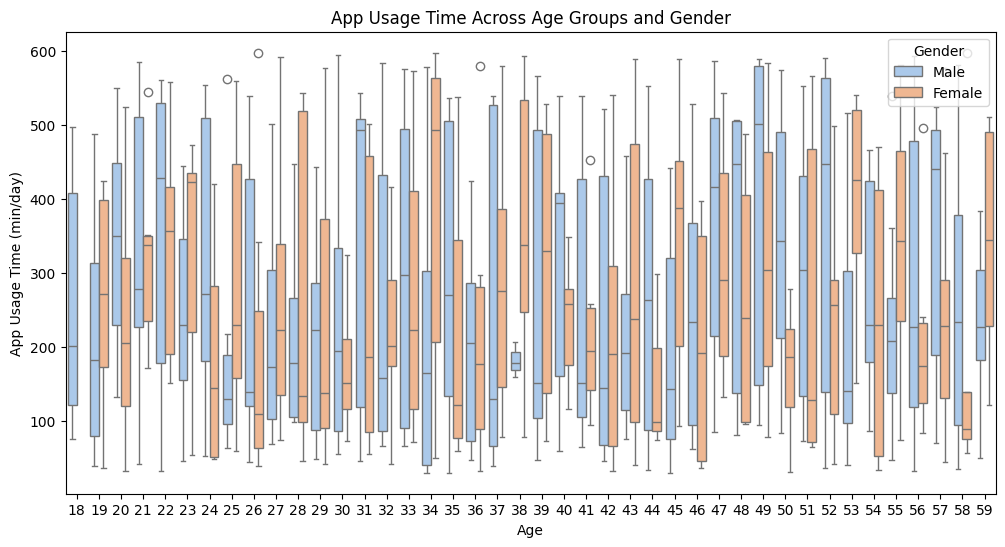

In [ ]:
# Create a box plot to visualize the distribution of app Usage Time across age groups and gender

plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='App Usage Time', hue='Gender', data=data, palette='pastel')
plt.title('App Usage Time Across Age Groups and Gender')
plt.xlabel('Age')
plt.ylabel('App Usage Time (min/day)')
plt.legend(title='Gender')
plt.show()


## More Data


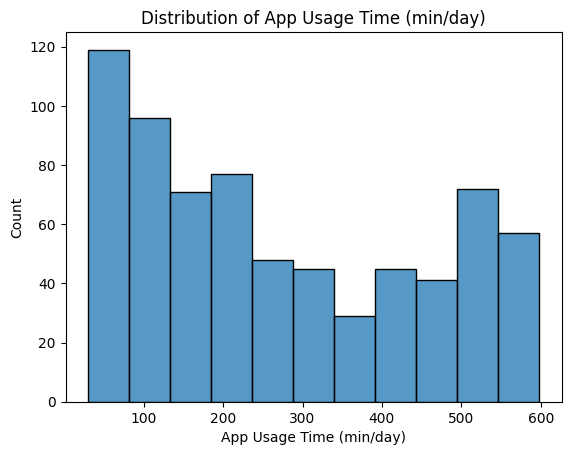

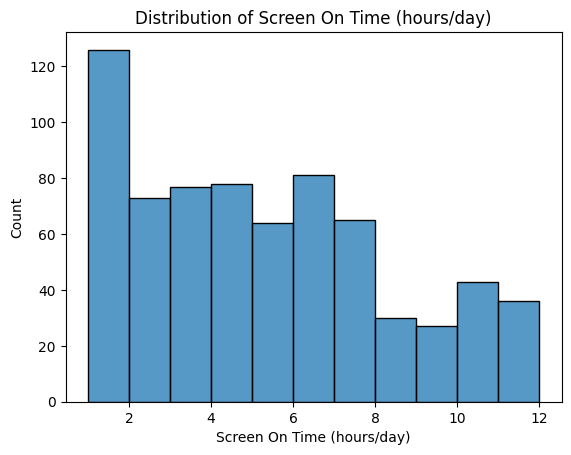

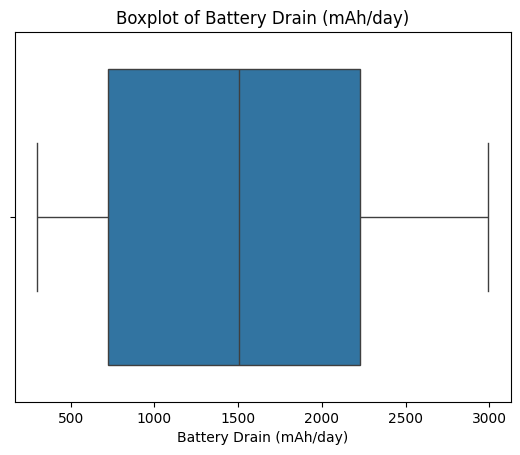

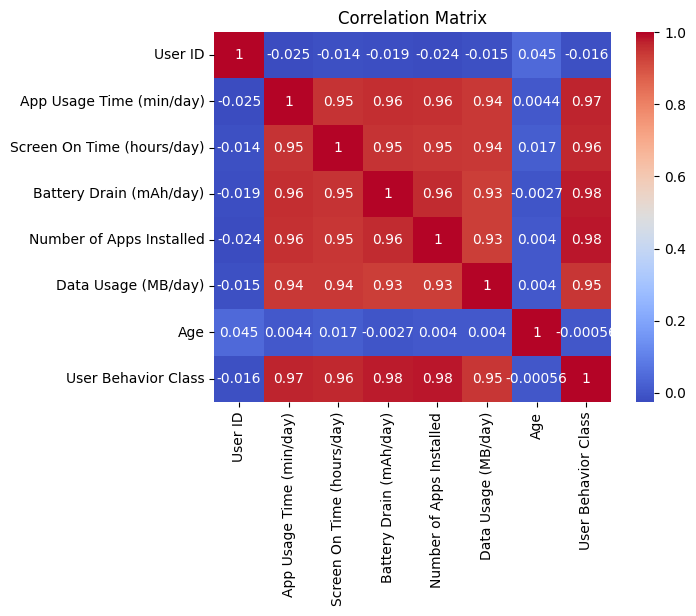

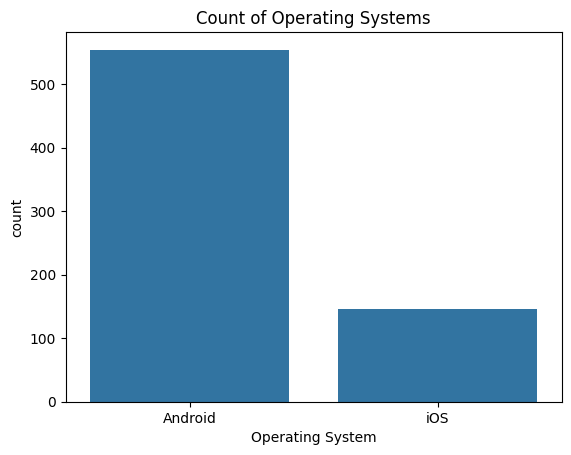

T-statistic: 39.68877459278398, P-value: 2.47028955582671e-231
Model Accuracy: 1.0


In [ ]:
sns.histplot(data['App Usage Time (min/day)'])
plt.title('Distribution of App Usage Time (min/day)')
plt.show()

sns.histplot(data['Screen On Time (hours/day)'])
plt.title('Distribution of Screen On Time (hours/day)')
plt.show()


sns.boxplot(x='Battery Drain (mAh/day)', data=data)
plt.title('Boxplot of Battery Drain (mAh/day)')
plt.show()

numeric_data = data.select_dtypes(include=[float, int])


corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


sns.countplot(x='Operating System', data=data)
plt.title('Count of Operating Systems')
plt.show()


t_stat, p_val = stats.ttest_ind(data['App Usage Time (min/day)'], data['Screen On Time (hours/day)'])
print(f"T-statistic: {t_stat}, P-value: {p_val}")

X = data.drop('User Behavior Class', axis=1)
y = data['User Behavior Class']


X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)


accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")




##Deliverable 3

In [ ]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

cluster_profile = data.groupby('Cluster')[numerical_columns].mean()
print(cluster_profile)


            User ID  App Usage Time (min/day)  Screen On Time (hours/day)  \
Cluster                                                                     
0        338.034247                535.842466                    9.894521   
1        351.702128                 97.468085                    2.291489   
2        355.944853                309.084559                    5.882721   

         Battery Drain (mAh/day)  Number of Apps Installed  \
Cluster                                                      
0                    2661.801370                 88.328767   
1                     676.996454                 22.943262   
2                    1794.393382                 59.231618   

         Data Usage (MB/day)        Age  User Behavior Class  
Cluster                                                       
0                1935.630137  38.575342             4.931507  
1                 331.287234  38.436170             1.517730  
2                1010.275735  38.481618            

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select relevant features
features = data[['Age', 'App Usage Time (min/day)', 'Data Usage (MB/day)', 'Number of Apps Installed']]

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters (n_clusters)
data['Cluster'] = kmeans.fit_predict(scaled_features)

print("Cluster Centers:")
print(kmeans.cluster_centers_)


Cluster Centers:
[[ 7.70432884e-03  1.49494328e+00  1.57171336e+00  1.39827804e+00]
 [-3.88917345e-03 -9.80728941e-01 -9.35095531e-01 -1.03023666e+00]
 [-1.03254040e-04  2.14352361e-01  1.25833782e-01  3.17566714e-01]]


KMeans(n_clusters=1, random_state=42)

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

KMeans(n_clusters=10, random_state=42)

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Elbow Method for Optimal Clusters')

Text(0.5, 0, 'Number of Clusters (k)')

Text(0, 0.5, 'Inertia (Sum of Squared Distances)')

([<matplotlib.axis.XTick at 0x793283ac9510>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

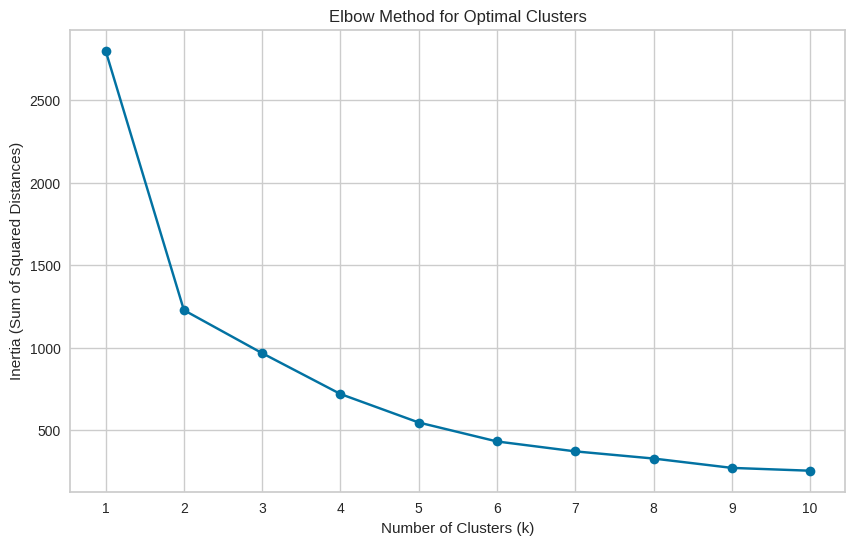

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = data[['Age', 'App Usage Time (min/day)', 'Data Usage (MB/day)', 'Number of Apps Installed']]

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

inertia_values = []

# Try different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


Text(0.5, 1.02, 'Pair Plot of Features with Clusters')

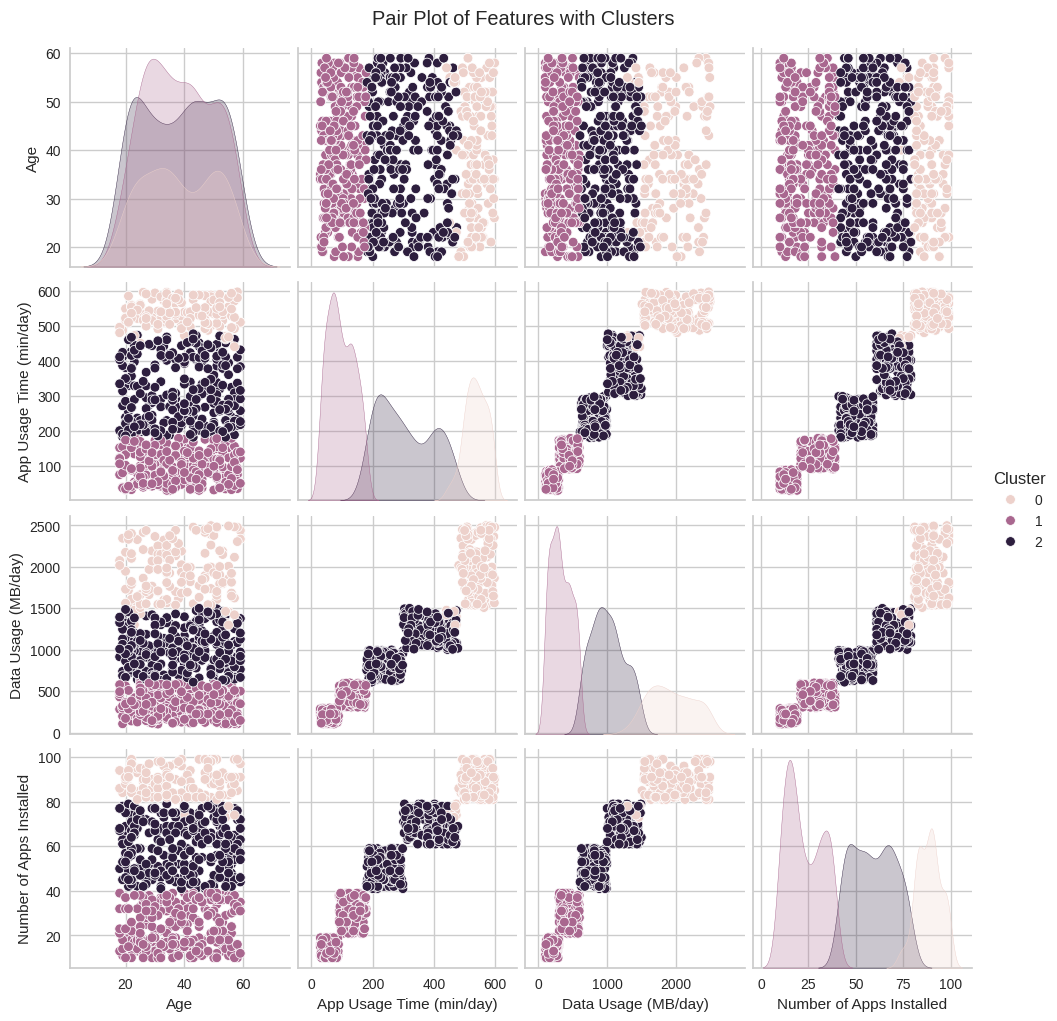

In [ ]:
import seaborn as sns

# Plot to show relationships between features and clusters
sns.pairplot(data, hue='Cluster', vars=['Age', 'App Usage Time (min/day)', 'Data Usage (MB/day)', 'Number of Apps Installed'])
plt.suptitle('Pair Plot of Features with Clusters', y=1.02)
plt.show()


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Device Model', ylabel='count'>

Text(0.5, 1.0, 'Device Model Distribution Across Clusters')

Text(0.5, 0, 'Device Model')

Text(0, 0.5, 'Count')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Google Pixel 5'),
  Text(1, 0, 'OnePlus 9'),
  Text(2, 0, 'Xiaomi Mi 11'),
  Text(3, 0, 'iPhone 12'),
  Text(4, 0, 'Samsung Galaxy S21')])

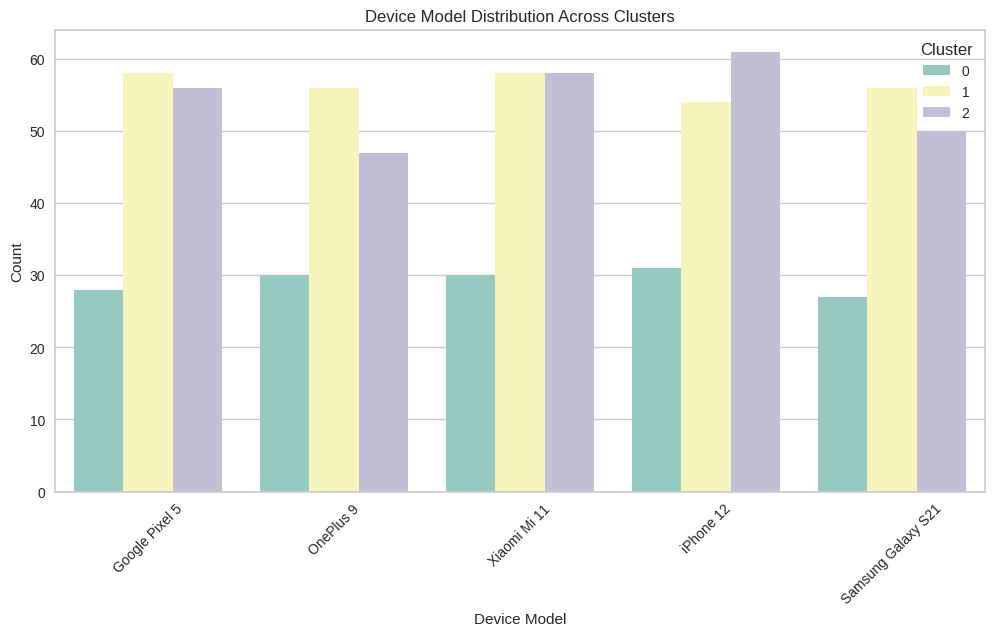

In [ ]:
#A Create a count plot to show the distribution of Device Model across different cluster categories

plt.figure(figsize=(12, 6))
sns.countplot(x='Device Model', hue='Cluster', data=data, palette='Set3')
plt.title('Device Model Distribution Across Clusters')
plt.xlabel('Device Model')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Cluster 0 may consist of users preferring premium devices (iPhone 12).

Cluster 1 shows a stronger affinity for brands like Google and OnePlus.

Cluster 2 reflects a preference for Xiaomi and Samsung devices, possibly indicating cost-conscious or tech-savvy users.
